# Assignment 1
## Benford's First Digit Law Implementation
### Naitik Malav-CS19BTECH11026, Jai Goyal-CS19BTECH11027

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import scipy.stats as stats
from numpy import mean, absolute

In [18]:
df = pd.read_csv('benford.csv', encoding='ISO-8859-1', engine='python')

In [19]:
df.head()

,State,City,Population
0,Alabama,Autauga County,54571
1,Alabama,Baldwin County,182265
2,Alabama,Barbour County,27457
3,Alabama,NaN,22915
4,Alabama,Blount County,57322


In [92]:
def get_first_digit(number):
    while number>=np.power(10, 1):
        number = int(number/10);
    return int(number)

In [100]:
def count_freq(df):
    freq = {}
    
    for x in range(9):
        freq[str(x+1)] = 0
    
    for x in df['Population']:
        if x>0:
            first_digit = get_first_digit(x)
            freq[str(first_digit)] += 1
    return freq

In [101]:
def benford_frequency(df):
    y = {}
    for x in range(9):
        y[str(x+1)] = math.log10(1+1/(x+1))
     
    return np.array(list(y.values()))*len(df['Population'])

In [110]:
def first_digit_benfords_law(df):
    df_freq = count_freq(df)
    benford_freq = benford_frequency(df)
    
    digits = list(df_freq.keys())
    frequency = list(df_freq.values())
    
#     print(digits)
#     print(frequency)
#     print(benford_freq)
    
    X = np.power(frequency-benford_freq, 2)/benford_freq
    chi_squared_value = X.sum()
    print('chi square test p value=', chi_squared_value)

    #Get the p-value of the Chi-squared test statistic with N-p degrees of freedom
    chi_squared_p_value = stats.chi2.sf(x=chi_squared_value, df=8)
    print("MAD=",mean(absolute(frequency - mean(frequency))))
    
    plt.figure(figsize=(8, 6))
    plt.plot(digits, frequency, label="Benford's First digit Analysis on Population", color='black', linestyle='solid', marker='o', linewidth=2)
    plt.plot(digits, benford_freq, label="Actual Benford's First Digit Analysis", color='red', linestyle='dotted', marker='o', linewidth=2)
    plt.xlabel('Digits')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    

chi square test p value= 10.6314009212393
MAD= 194.14814814814815


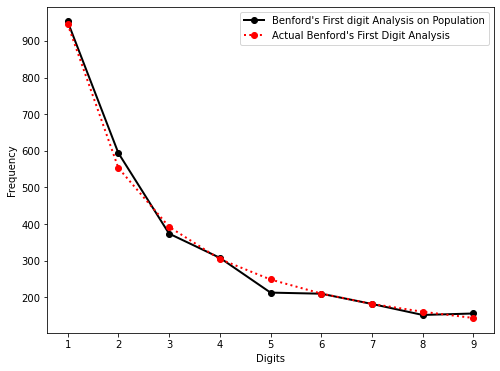

In [111]:
first_digit_benfords_law(df)